### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from scipy import stats     
import time
import statsmodels.api as sm
import pickle

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

### Checking how does the data looks like

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- Renaming the columns name because these names are not telling anything specific about columns.

### Renaming the columns

In [4]:
df.rename(columns={'W':'Wins','R':'Runs','AB':'At_Bats','H': 'Hits','2B': 'Doubles','3B':'Triples','HR':'Homeruns','BB': 'Walks','SO' :'Strikeouts','SB': 'Stolen_Bases', 'RA':'Runs_Allowed','ER': 'Earned_Runs','ERA' :'Earned_Run_Average_(ERA)','SHO':'Shutouts','SV':'Saves','CG': 'Complete_Games' ,'E':'Errors'},inplace=True)

In [5]:
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- Now here the column names telling the exact things about the column 

### Checking how big data set is

In [6]:
df.shape

(30, 17)

- Our data has 30 rows and 17 columns

### Checking the information and data types of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Games            30 non-null     int64  
 14  Shutouts    

<h4>Observations</h4>

- There are total 17 number of columns out of which 16 are of int type and only one column (Earned_Run_Average_(ERA)) is of float type.

- There are no missing values in any of the columns.

- Data set consumes 4.1 kb.

### Checking for missing values

In [8]:
df.isnull().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

- None of the columns have missing values

###  Checking how does the data looks mathematically.

In [9]:
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<h4>Observations</h4>

- None of the columns have missing values.
- In all the columns mean & median values are nearly equal hence there might not be any outliers presents in any of the columns.

- Runs,At_bats,Hits,Doubles,Homeruns,Walks,Strikeouts,Runs_Allowed,Earned_Runs columns has high standard deviation.
- In Stolen_Bases & Errors column there is a difference between 75th percentile and 100th percentile hence there might be outliers present in both columns.

### Checking for duplicate values

In [10]:
df.duplicated().sum()

0

- The is no duplicate rows present in our data

### Checking for the correlation

In [11]:
df.corr()['Wins']*100 

Wins                        100.000000
Runs                         43.075053
At_Bats                      -8.794664
Hits                          3.761244
Doubles                      42.779687
Triples                     -25.111773
Homeruns                     30.740738
Walks                        48.434170
Strikeouts                   11.184973
Stolen_Bases                -15.723408
Runs_Allowed                -81.295190
Earned_Runs                 -80.943475
Earned_Run_Average_(ERA)    -81.959971
Complete_Games                8.053344
Shutouts                     47.180516
Saves                        66.652962
Errors                       -8.948462
Name: Wins, dtype: float64

### Observations

- Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA) columns are - 80 % negativly corellated.
- Saves,Shutouts,Walks,Runs,Doubles are positively correlated with the output column.

### plotting heatmap

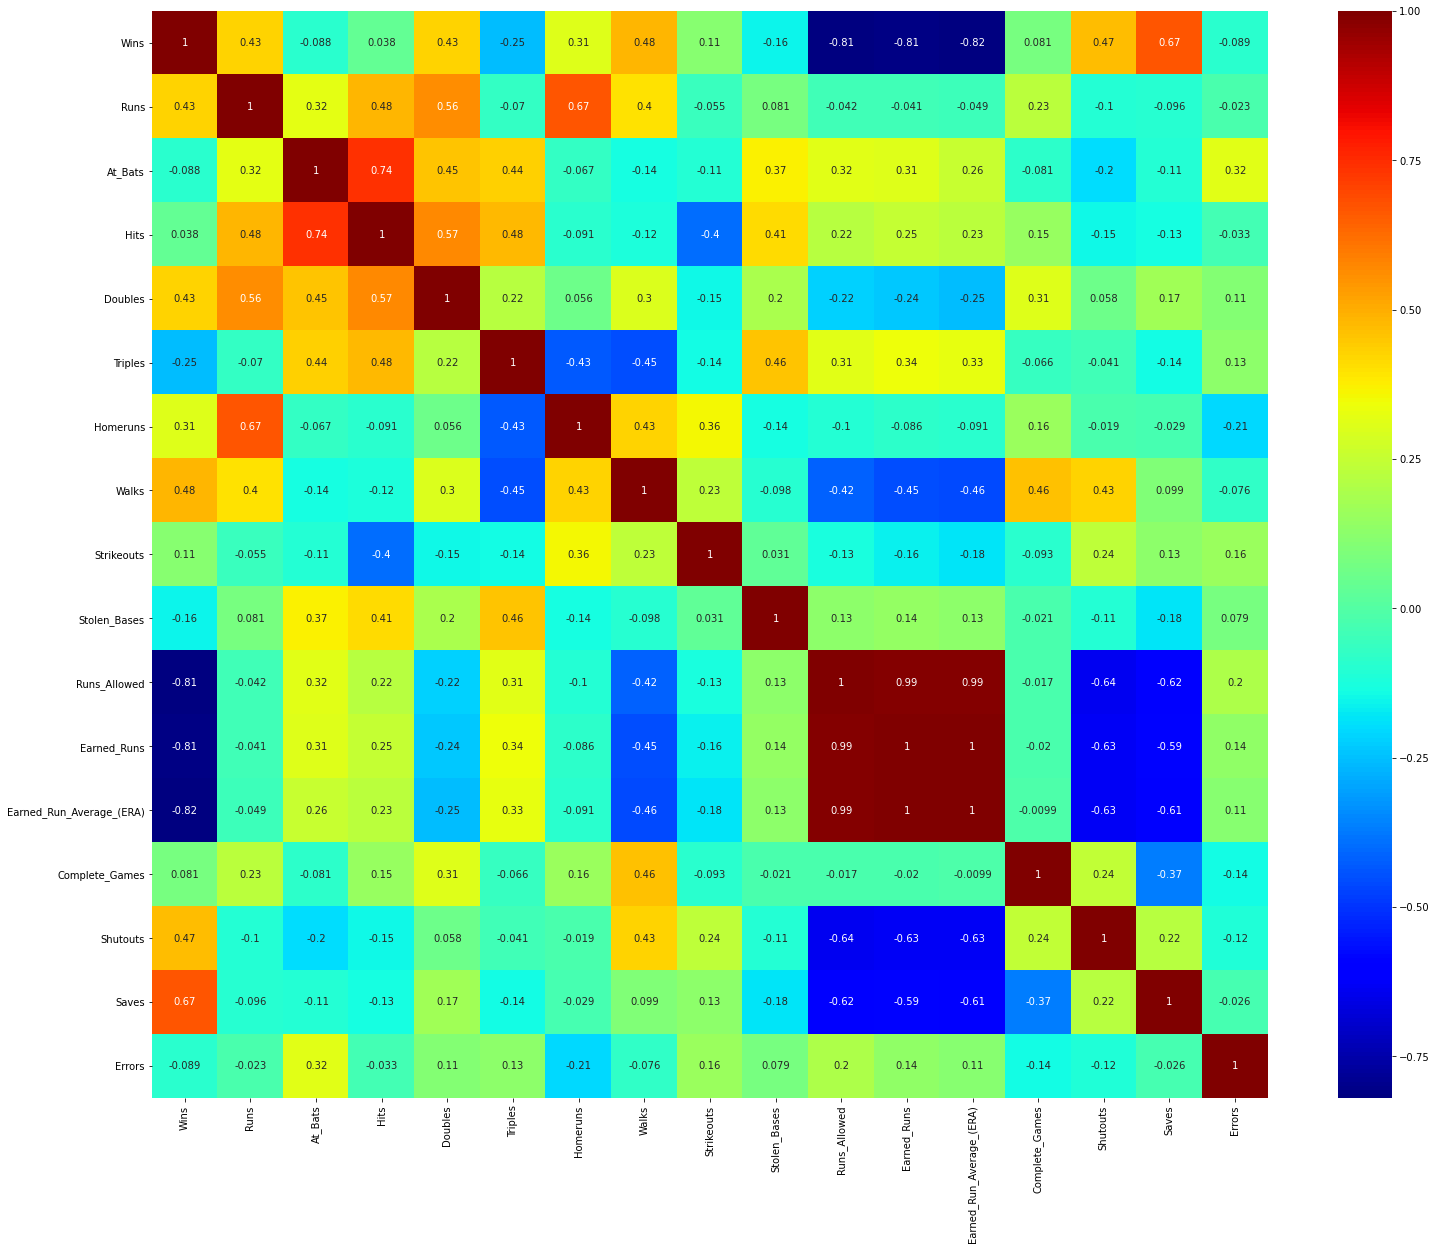

In [12]:
corrr = df.corr()
top_corr_features = corrr.index
plt.figure(figsize=(25,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='jet')
plt.show()

### Observations

- Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA) columns are - 80 % negativly corellated.
- Saves,Shutouts,Walks,Runs,Doubles are positively correlated with the output column.
- Runs_allowed columns is -62 % correlated with saves , -64% with Shoutouts ,99 % correlated with ERA & Earned Runs.
- Earned_runs is -59% correlated with  saves and 63% correlated with Shoutouts columns
- ERA is -61% & -69% corre;ated with Saves & Shoutouts columns

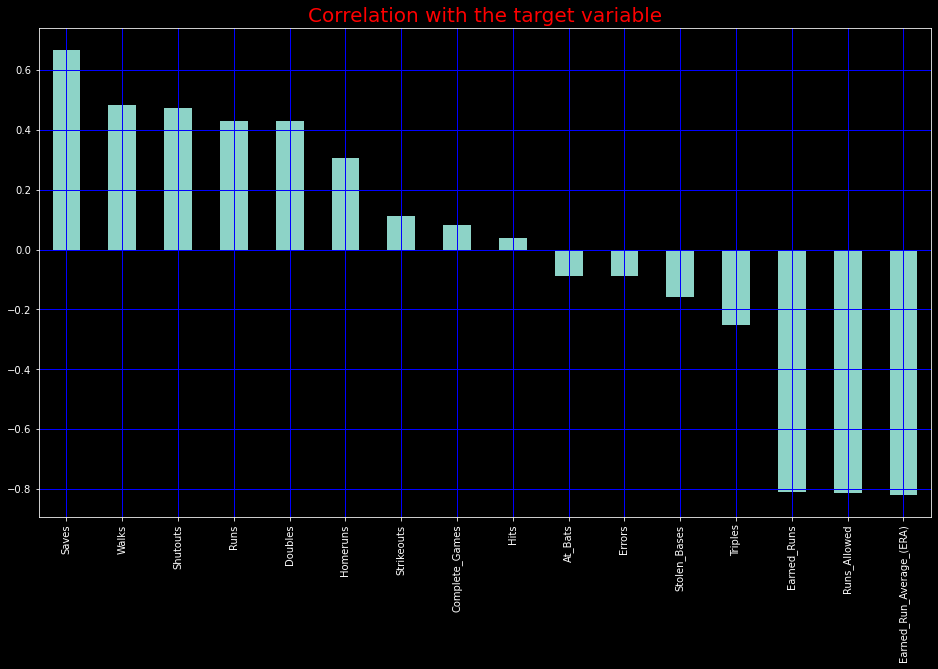

In [14]:
plt.figure(figsize=(16,9))
plt.style.use('dark_background')
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot.bar()
plt.title('Correlation with the target variable',fontsize=20,color='r')
plt.grid(color='b',linewidth=1)
plt.show()


### Observation:

- Saves,Walks,Shutouts,Runs & Doubles these are important features which are positivly correlated to our Target Attribute Wins.
- Earned_Run_Average,Runs Allowed,Earned_Runs these are the features which are highly negatively correlated to our target attribute.
- Feature like Hits,At bats has correlation value near to zero which means almost no significance for target attribute prediction.

# Univariate Analysis

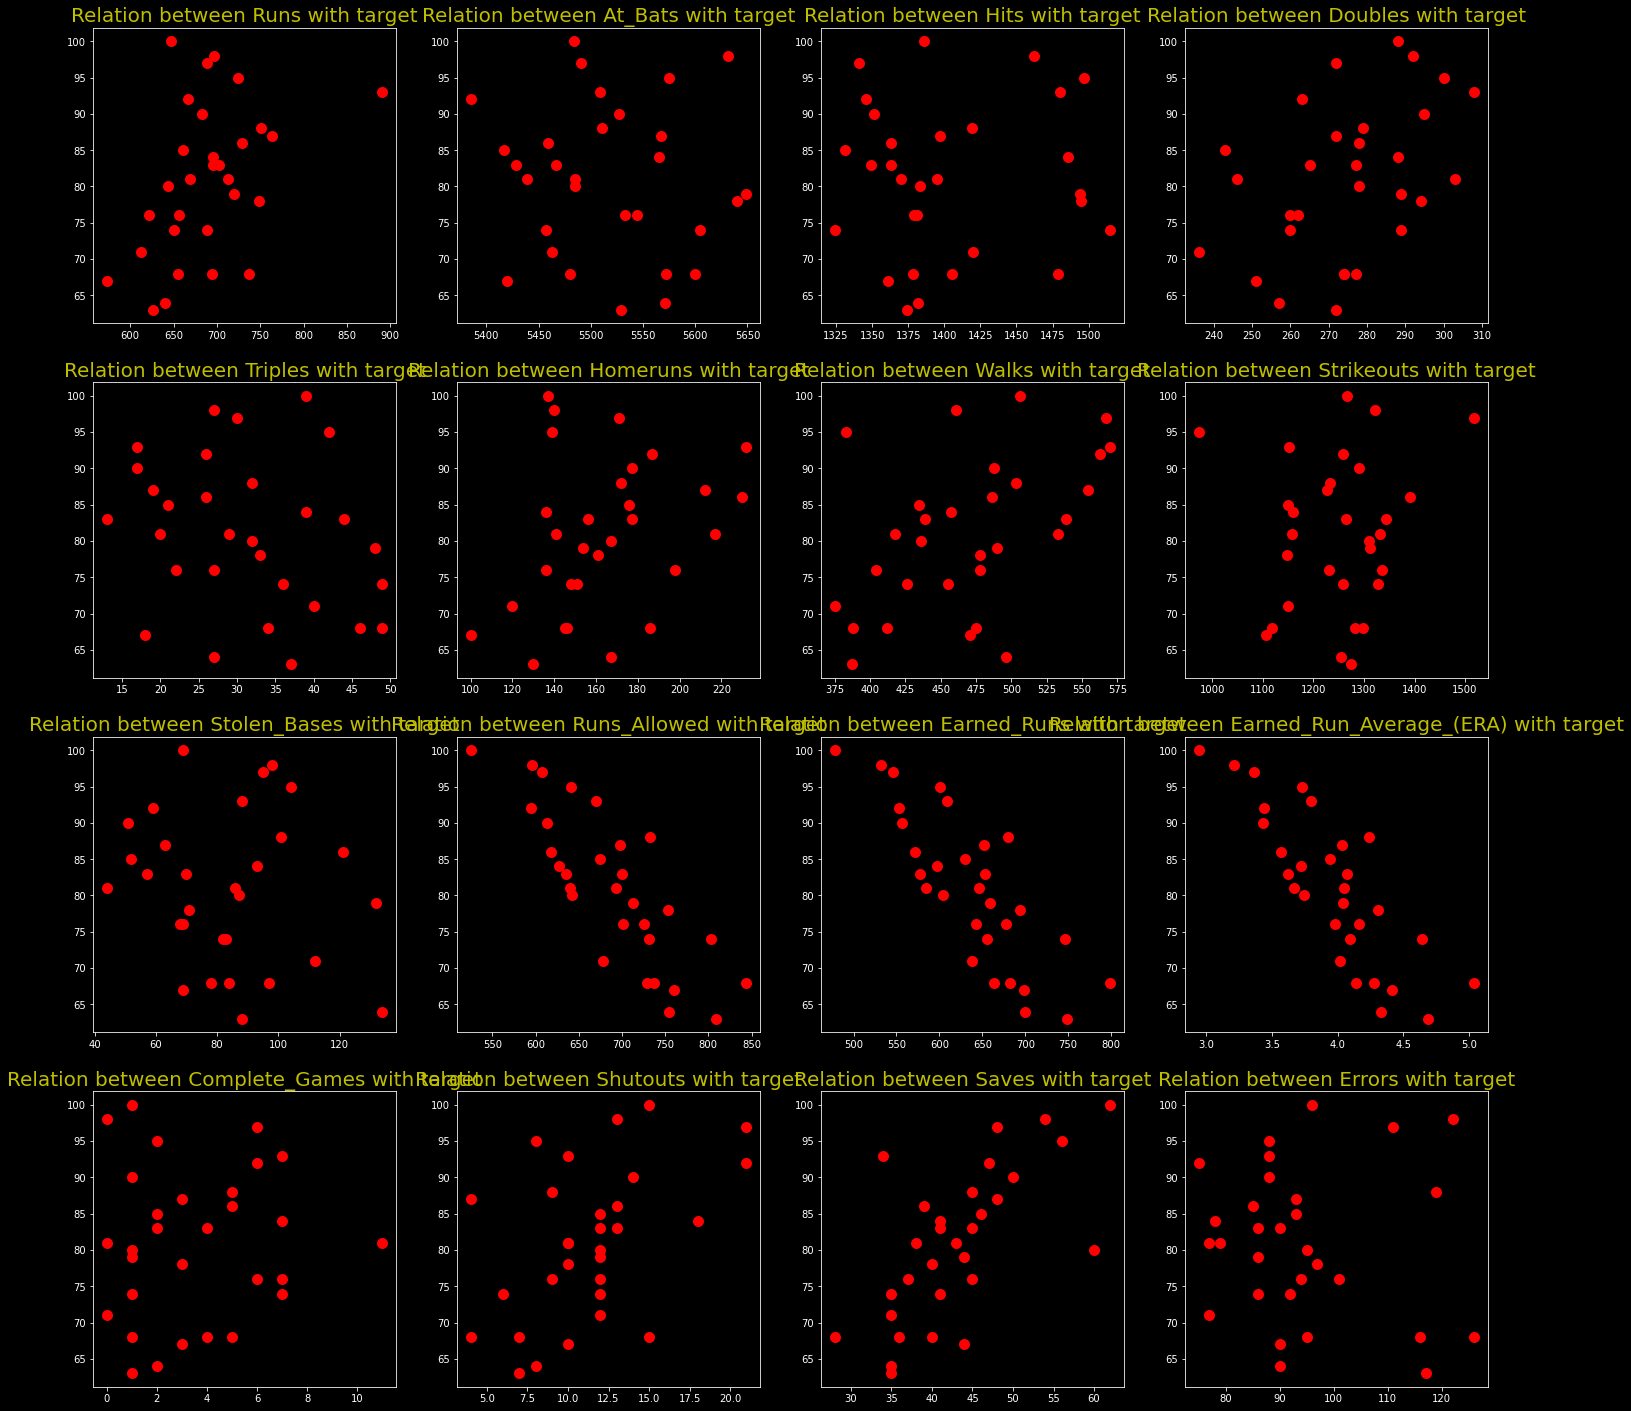

In [15]:
plt.figure(figsize=(25,25))
plt.style.use('dark_background')
for i ,j in enumerate(df.columns[1:]):
    plt.subplot(4,4,i+1)
    plt.scatter(df[j],df['Wins'],color='r',linewidths=5)
    plt.xticks(fontsize=10,color='w')
    plt.yticks(fontsize=10,color='w')
    plt.title(f"Relation between {j} with target",fontsize=20,color='y')
plt.show()    

### Observations

- Home Runs,Walks,Shoutouts,Saves shows sort of linear relationship , where as Runs_allowed,Earned_runs,Earned_runs_average shows negative linear relationship.

- Remaining columns shows there is no linear relationship.

#### Relation between Runs and Wins.

-  From above scater plot it shows number of runs increase the Game winning Chances. In other words if we score more runs our chances of winning will more.
 
####  Relation between At_bats and Wins.

- From above scater plot it shows there is no impact of At_bats column on Wins columns.

####  Relation between Home Runs and Wins.

-  From above scater plot it shows number of Home_Runs increase the Game winning Chances. In other words if we score more Home_Runs our chances of winning will more.

####  Relation between Earned_Runs and Wins.

-  From above scater plot it shows number of Earned_Runs increase the Game winning Chances. In other words if we score more Earned_Runs our chances of winning will more.

####  Relation between Runs_allowed and Wins.

-  From above scater plot it shows there is a inverse relationship between both the columns as the Runs_allowed decreases the chance of wining increases.

####  Relation between Saves and Wins.

- From the above scatter plot it is cleare that there is a strong relation between Saves and Wins it means the more you save the more the chances of wining the game.

####  Relation between Doubles  and Wins.
 
 - It is clear that Doubles are the key to win the matches the more the team take doubles the chance of wining will increase.
 
  

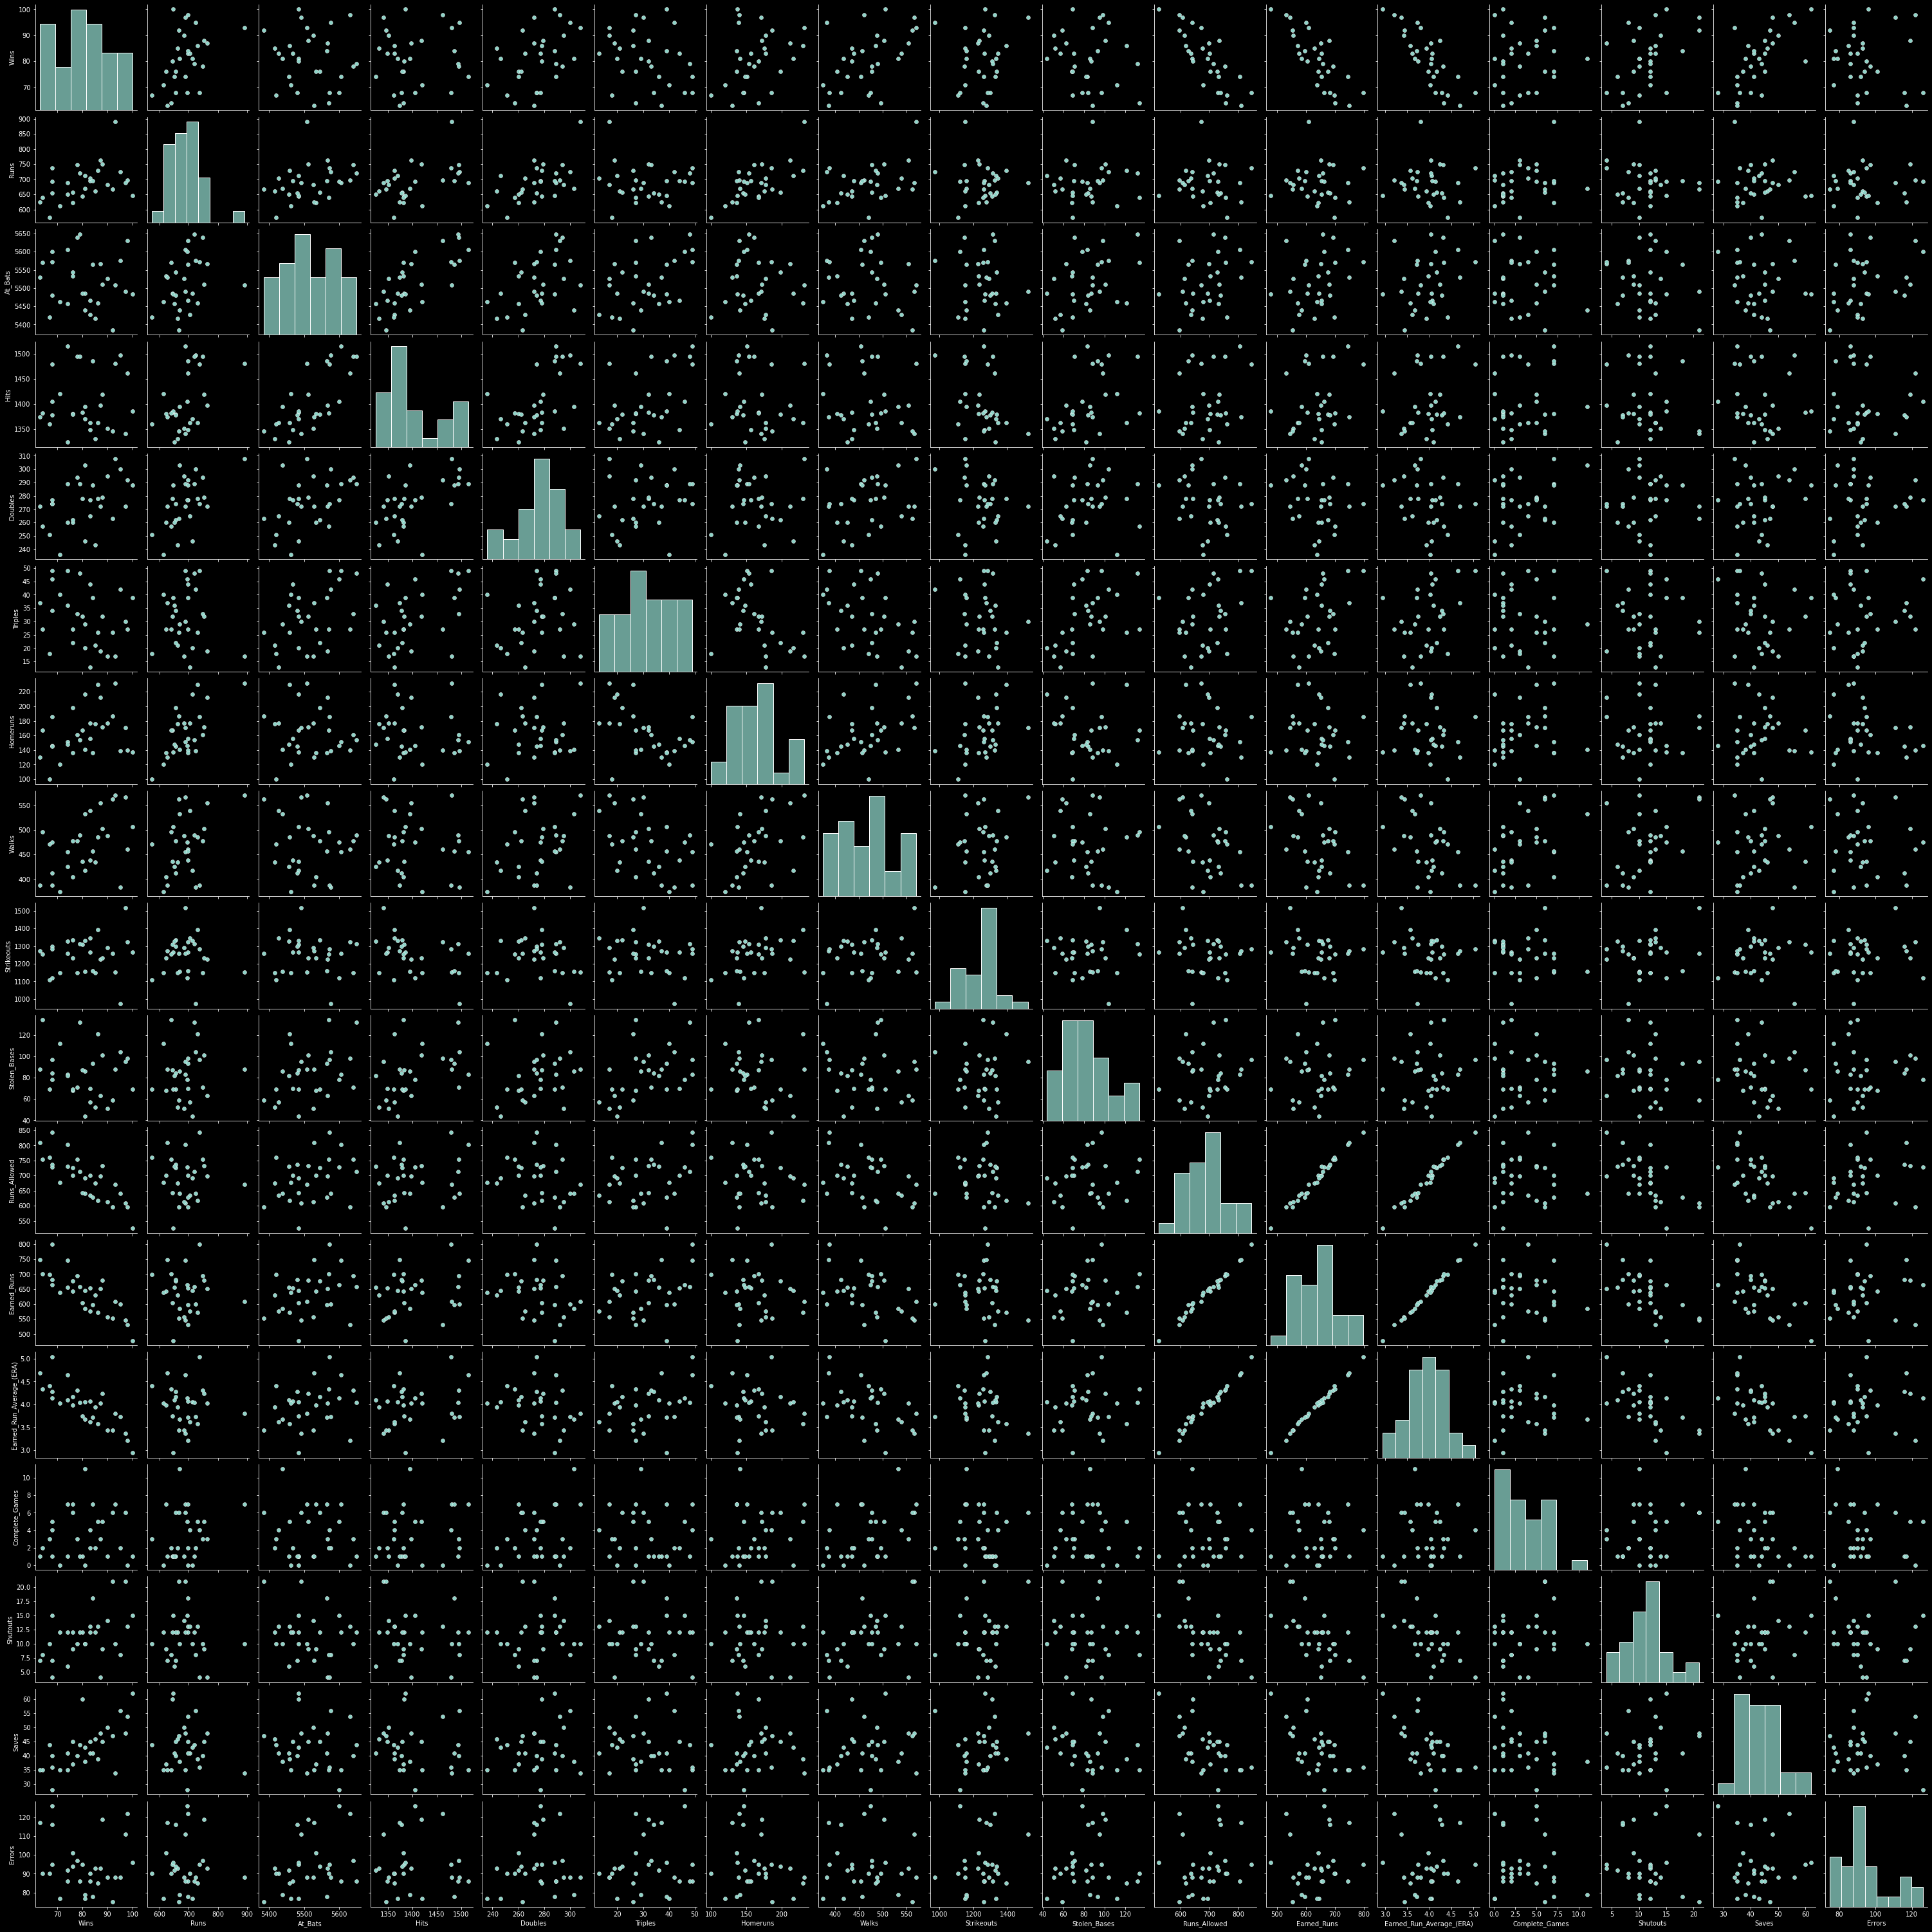

In [16]:
sns.pairplot(df)

In [17]:
X=df.drop('Wins',axis=1)
y=df['Wins']

In [18]:
X.shape

(30, 16)

In [19]:
y.shape

(30,)

### Feature Importance

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

- Selecting top columns for model to predict the output 

In [21]:
print(model.feature_importances_) 

[0.06501091 0.06151023 0.0624602  0.0793174  0.06564518 0.05585816
 0.05216333 0.0538106  0.07614983 0.05780386 0.06314238 0.06292923
 0.05524103 0.05552363 0.05803087 0.07540317]


- These are the scores for features which has been given by the Extratreeclassifier

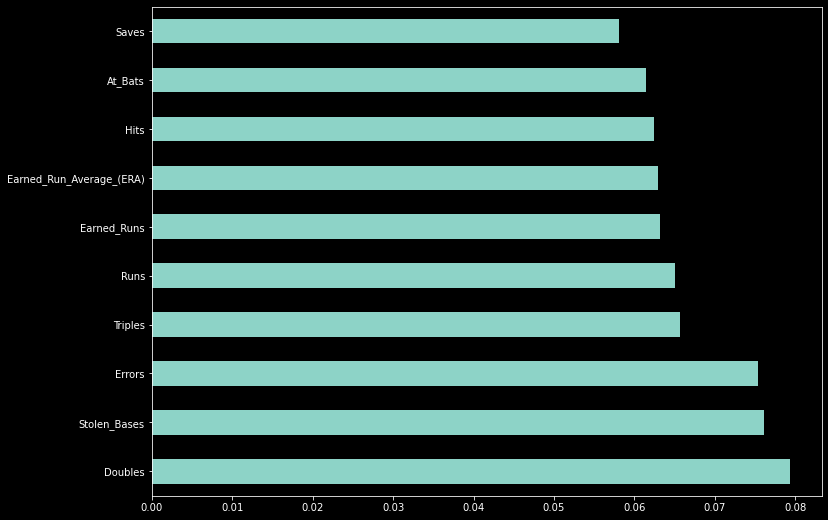

In [28]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(12,9))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- Errors column has highest score which means this column is the important column to predict the output
- These are the top 10 columns which we are using to predict the output.

In [29]:
X=X.drop(columns=['Walks','Strikeouts','Complete_Games','Shutouts','Earned_Run_Average_(ERA)','Earned_Runs'],axis=1)

- Dropping the remaining columns.

In [30]:
df=X.copy()

In [31]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64

In [32]:
df.head()

,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Stolen_Bases,Runs_Allowed,Saves,Errors
0,724,5575,1497,300,42,139,104,641,56,88
1,696,5467,1349,277,44,156,70,700,45,86
2,669,5439,1395,303,29,141,86,640,38,79
3,622,5533,1381,260,27,136,68,701,37,101
4,689,5605,1515,289,49,151,83,803,35,86


### Checking for Data Distributions

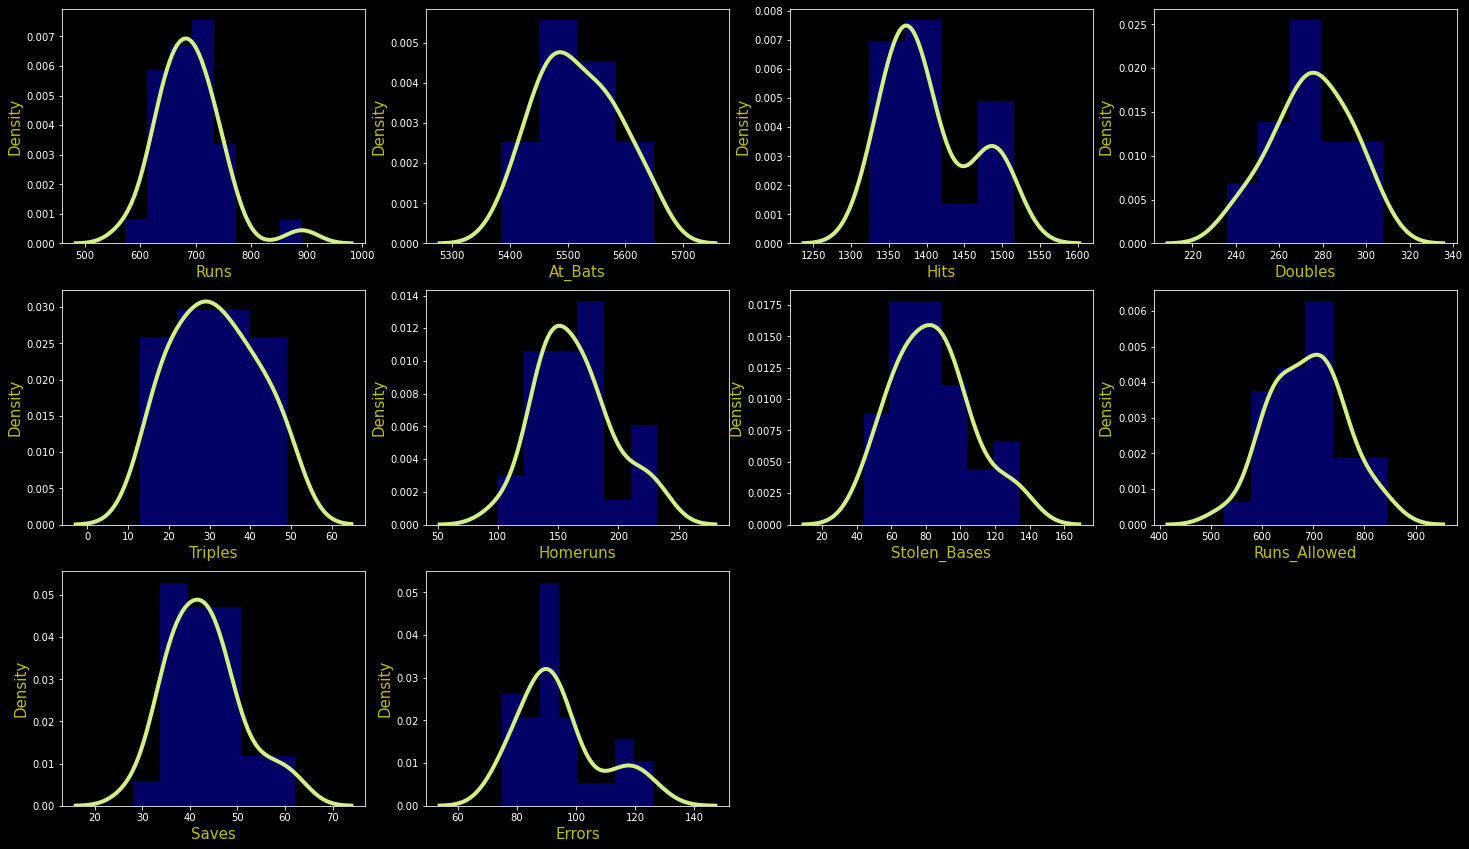

In [33]:
plt.figure(figsize=(25,25))
plt.grid(b=2,axis='y')
# plt.style.use('seaborn-white')
for i ,j in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.distplot(df[j],color='b',kde_kws={'color': '#D3F086','linewidth':4})
    plt.xlabel(j,fontsize=15,color='y',)
    plt.ylabel('Density',fontsize=15,color='y')
    plt.xticks(color='w',fontsize=10)
    plt.yticks(color='w',fontsize=10)
plt.show()   

- Looks like All the columns has normally distributed Data

### Checking for outliers

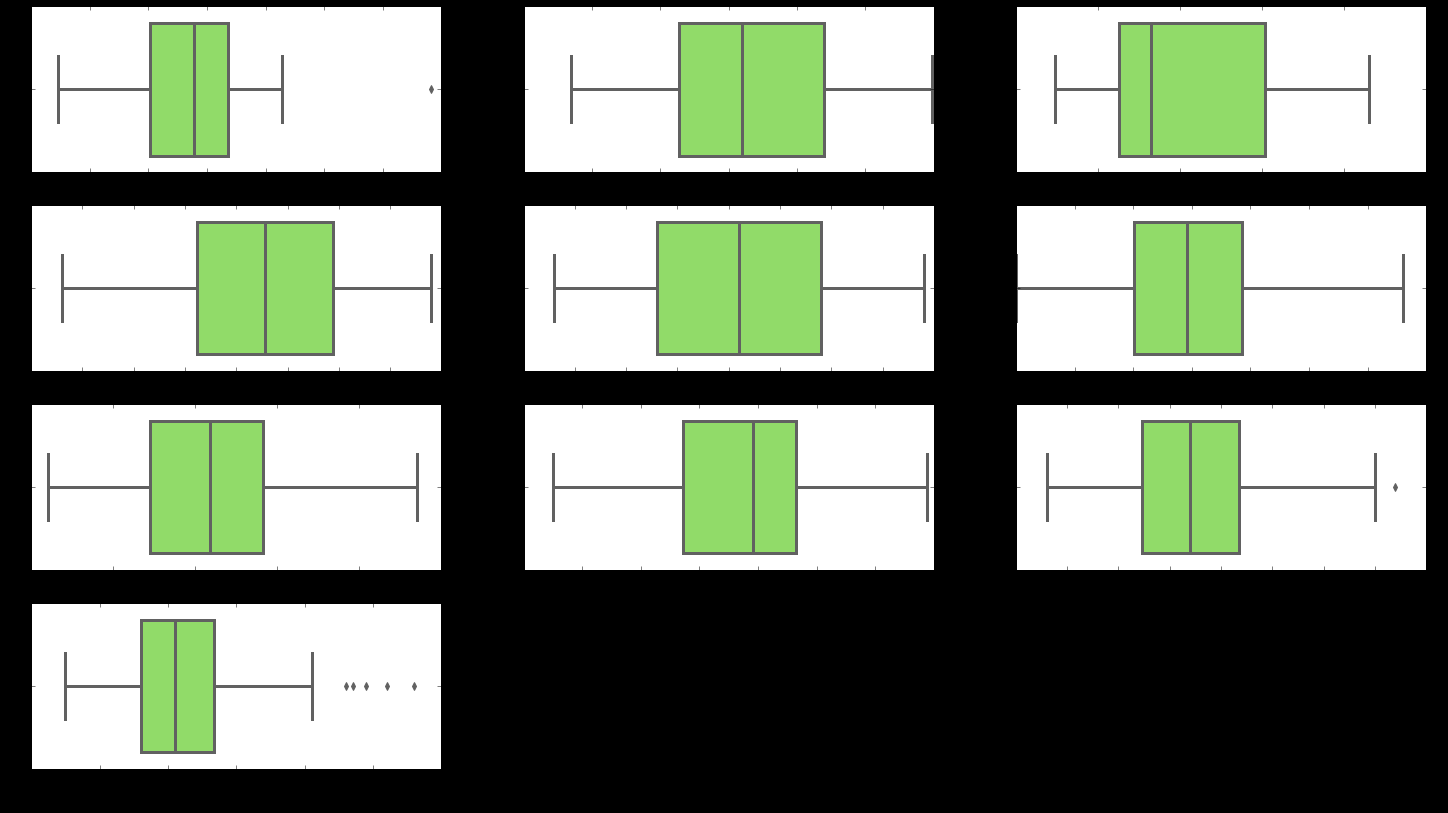

In [34]:
plt.figure(figsize=(25,25))
plt.style.use('Solarize_Light2')
plt.style.use('classic')
for i ,j in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[j],color='#8BEE56',width=0.8,linewidth=3)
    plt.xlabel(j,fontsize=15,color='k',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show()  

- Errors columns has 5 outliers.

###  Removing outliers using IQR method

In [35]:
l=["Errors",'Runs','Saves']
# columns having outliers
for i in l:
    IQR = df[i].quantile(.75) - df[i].quantile(.25)
    upper =  df[i].quantile(.75) + 1.5 * IQR
    lower =  df[i].quantile(.75) - 1.5 * IQR
    df[i] = np.where(df[i]> upper ,upper , np.where(df[i]<lower , lower ,df[i]))

### Boxplot after Outliers removal

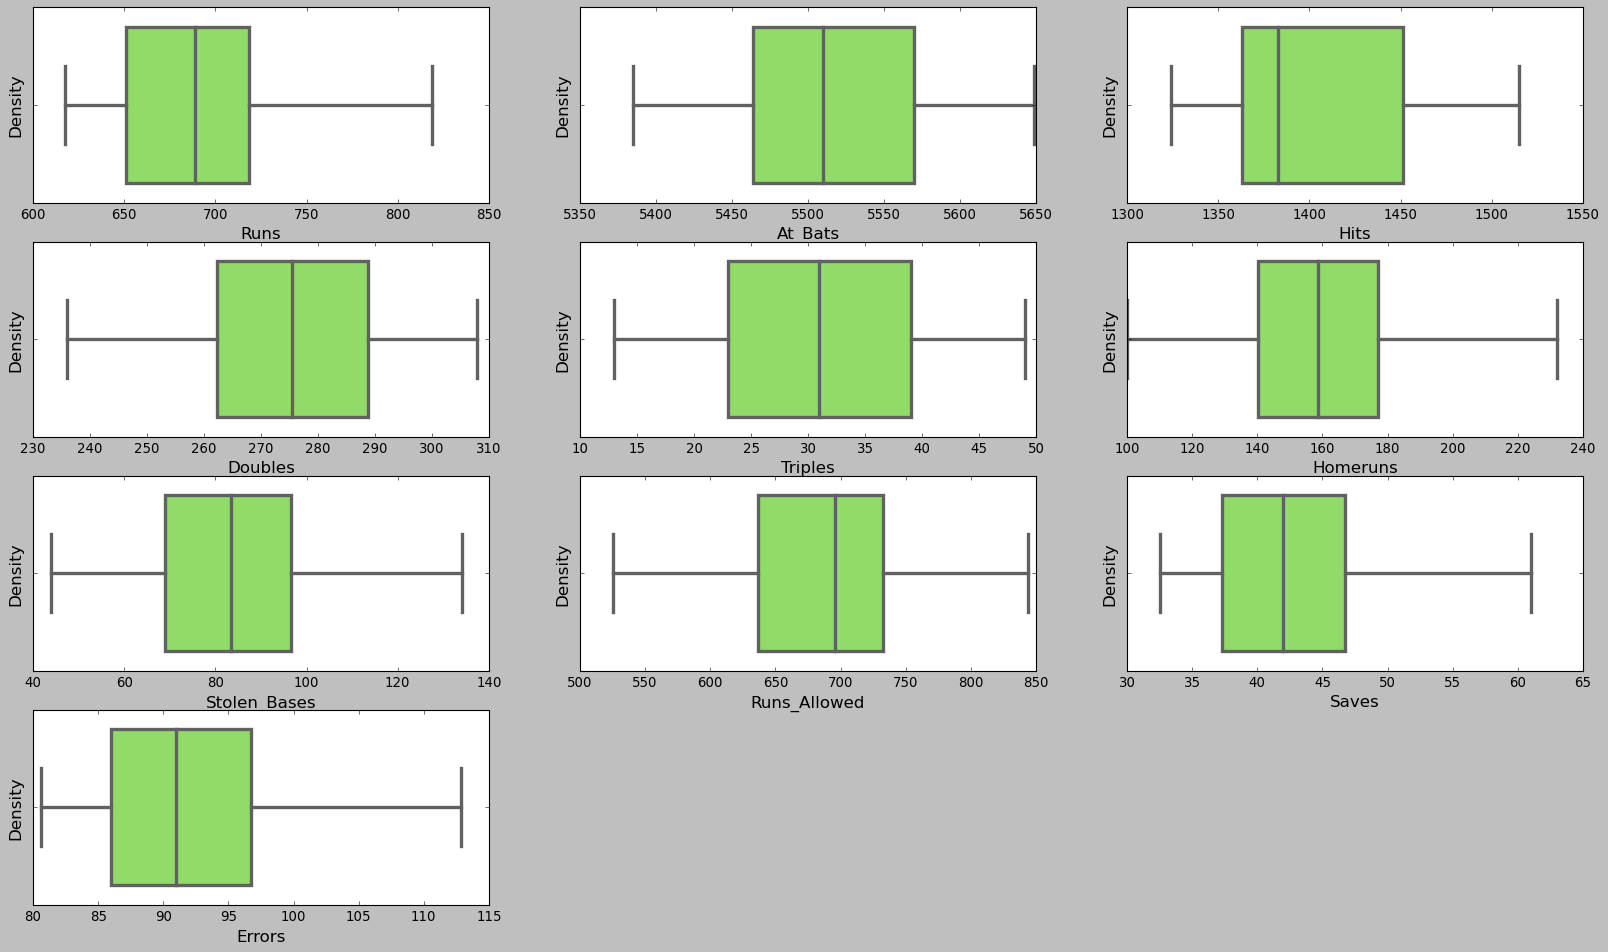

In [36]:
plt.figure(figsize=(25,25))
plt.style.use('Solarize_Light2')
plt.style.use('classic')
for i ,j in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[j],color='#8BEE56',width=0.8,linewidth=3)
    plt.xlabel(j,fontsize=15,color='k',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show()  

- From the above boxplot we can clearly see that outliers has been sucessfully removed.

# Checking Skewness

In [37]:
df.skew()

Runs            0.628106
At_Bats         0.183437
Hits            0.670254
Doubles        -0.230650
Triples         0.129502
Homeruns        0.516441
Stolen_Bases    0.479893
Runs_Allowed    0.045734
Saves           0.807145
Errors          0.758756
dtype: float64

- There are some columns which has skewness 

In [38]:
columns_with_skewness=[]
for i in df.columns:
    if df[i].skew() > 0.5:
        columns_with_skewness.append(i)

In [39]:
columns_with_skewness

['Runs', 'Hits', 'Homeruns', 'Saves', 'Errors']

These are the columns that has skewness so we have to remove it.

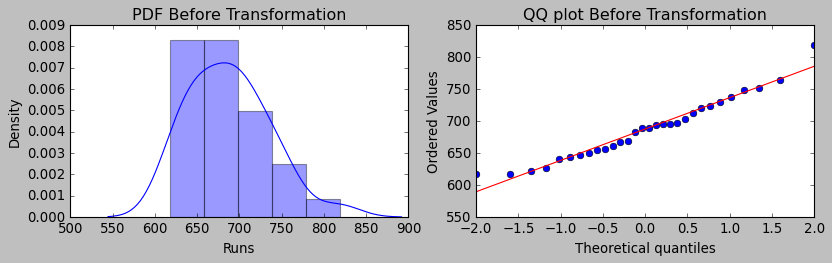

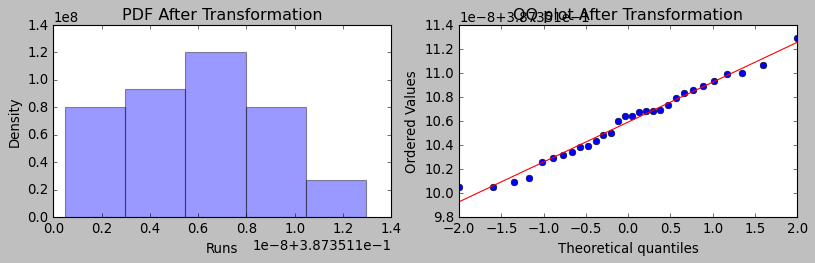

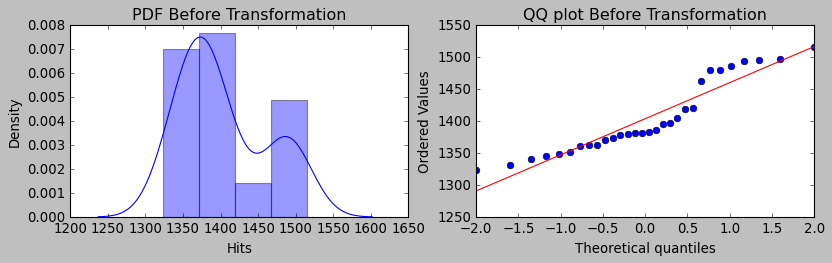

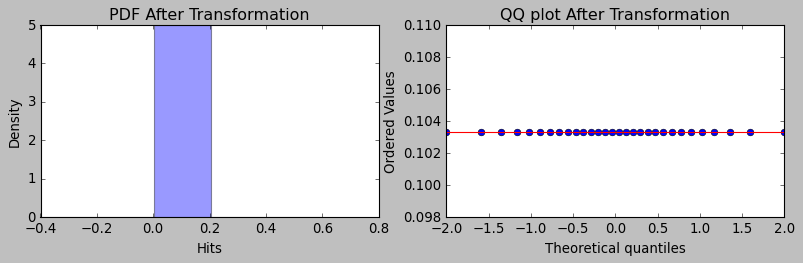

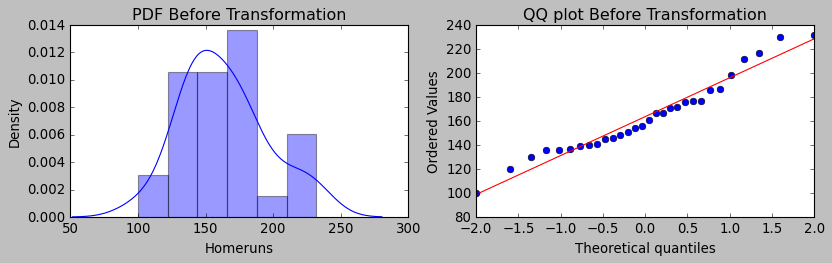

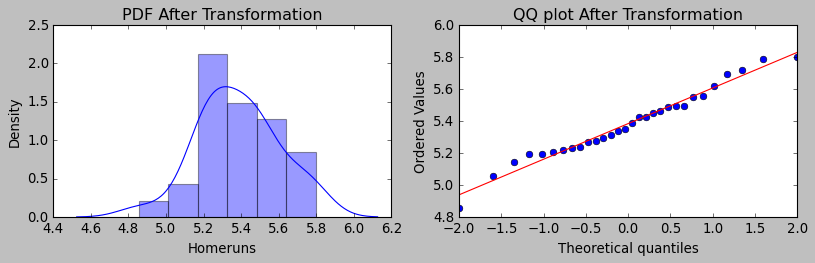

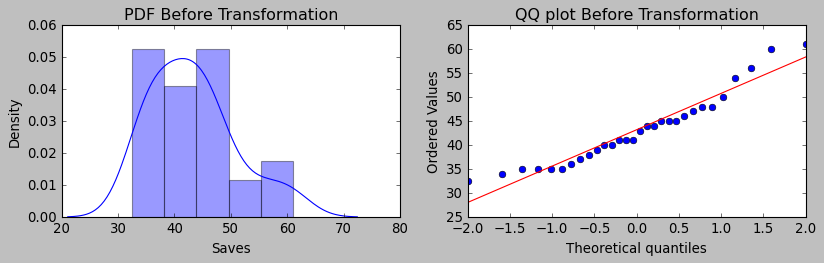

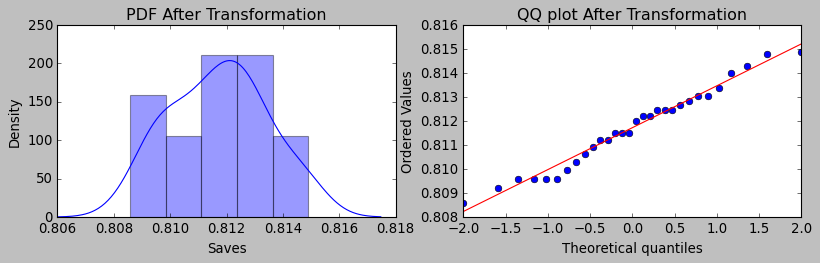

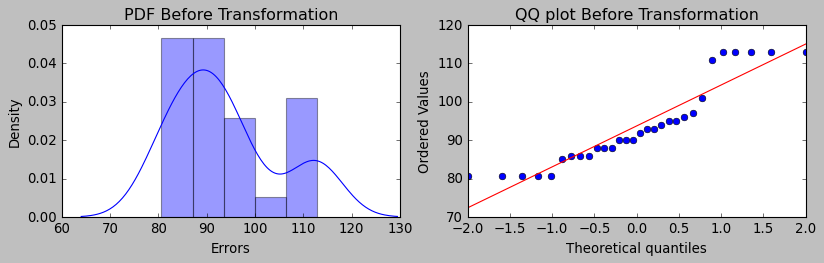

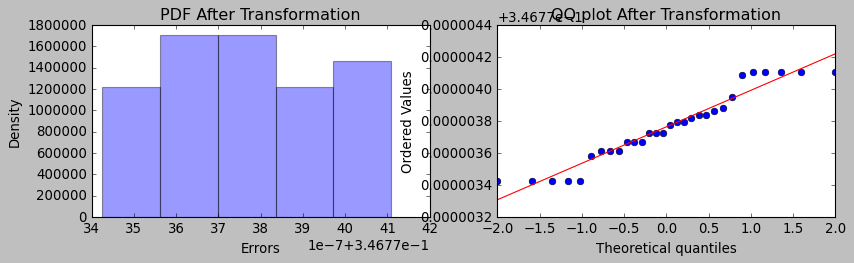

In [40]:
# performing Boxcox transformation on right skewed columns
for i, j in enumerate(columns_with_skewness):
    plt.figure(figsize=(12,3))
    plt.subplot(2,4,i+1)
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot Before Transformation')
    df[j],params = stats.boxcox(df[j]+0.01)
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF After Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot After Transformation')
    plt.show()

In [41]:
df.skew()

Runs            0.000000
At_Bats         0.183437
Hits            0.000000
Doubles        -0.230650
Triples         0.129502
Homeruns       -0.000089
Stolen_Bases    0.479893
Runs_Allowed    0.045734
Saves           0.056964
Errors          0.000000
dtype: float64

Here we can clearly see that skewness has gone from the columns to recheck we can do.

In [42]:
columns_with_skewness=[]
for i in df.columns:
    if df[i].skew() > 0.5:
        columns_with_skewness.append(i)
else:
    print('No Skewness')      

No Skewness


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.ensemble import BaggingRegressor

### Creating a function to find best random state for models

In [44]:
def Best_model(pipe,X,y):
    Maximum_R2_score=0
    for random_state in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=random_state)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        R2_score=r2_score(y_test,y_pred)
        if R2_score>Maximum_R2_score:
            Maximum_R2_score=R2_score
            final_random_state=random_state
    print(f'At random state :-- {final_random_state}')
    print('Maximum r2 score is',  round(Maximum_R2_score ,4))
    print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
    print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
    print('Training accuracy',round(pipe.score(X_train,y_train),2))
    print('Test Accuracy',round(pipe.score(X_test,y_test),2))
    print('MAE',round(mean_absolute_error(y_test,y_pred),2))
    print('MSE',round(mean_squared_error(y_test,y_pred),2))
    print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

# Creating Pipeline

### Linear Regression

In [45]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()

Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 68
Maximum r2 score is 0.9529
cross validation score 0.33
Standard Deviation 0.53
Training accuracy 0.88
Test Accuracy 0.91
MAE 3.28
MSE 12.46
RMSE 3.53
Time taken by alogrithm to train is : 1.368112325668335 sec
---------------------------------------------------------------


### Ridge Regression

In [46]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = Ridge()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 68
Maximum r2 score is 0.9476
cross validation score 0.38
Standard Deviation 0.53
Training accuracy 0.88
Test Accuracy 0.91
MAE 3.17
MSE 11.83
RMSE 3.44
Time taken by alogrithm to train is : 1.1736223697662354 sec
---------------------------------------------------------------


### Lasso Regression

In [47]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = Lasso()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 73
Maximum r2 score is 0.9273
cross validation score 0.53
Standard Deviation 0.33
Training accuracy 0.85
Test Accuracy 0.91
MAE 3.15
MSE 12.03
RMSE 3.47
Time taken by alogrithm to train is : 1.091369867324829 sec
---------------------------------------------------------------


# ElasticNet Regression

In [48]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = ElasticNet()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 97
Maximum r2 score is 0.8565
cross validation score 0.43
Standard Deviation 0.32
Training accuracy 0.78
Test Accuracy 0.79
MAE 4.76
MSE 27.82
RMSE 5.27
Time taken by alogrithm to train is : 1.1244871616363525 sec
---------------------------------------------------------------


### KNeighborsRegressor


In [49]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 97
Maximum r2 score is 0.8033
cross validation score 0.34
Standard Deviation 0.27
Training accuracy 0.59
Test Accuracy 0.67
MAE 5.73
MSE 44.65
RMSE 6.68
Time taken by alogrithm to train is : 1.0833802223205566 sec
---------------------------------------------------------------


### DecisionTreeRegressor

In [50]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 99
Maximum r2 score is 0.6272
cross validation score -1.92
Standard Deviation 3.31
Training accuracy 1.0
Test Accuracy 0.63
MAE 5.83
MSE 50.5
RMSE 7.11
Time taken by alogrithm to train is : 1.2047033309936523 sec
---------------------------------------------------------------


### SVR

In [51]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = SVR()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 87
Maximum r2 score is 0.2859
cross validation score -0.32
Standard Deviation 0.27
Training accuracy 0.23
Test Accuracy 0.15
MAE 8.65
MSE 114.87
RMSE 10.72
Time taken by alogrithm to train is : 1.001159429550171 sec
---------------------------------------------------------------


### RandomForestRegressor

In [56]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 93
Maximum r2 score is 0.8363
cross validation score -0.48
Standard Deviation 2.05
Training accuracy 0.9
Test Accuracy 0.76
MAE 5.01
MSE 32.66
RMSE 5.71
Time taken by alogrithm to train is : 16.05492854118347 sec
---------------------------------------------------------------


### AdaBoostRegressor

In [54]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 99
Maximum r2 score is 0.8172
cross validation score -0.7
Standard Deviation 2.32
Training accuracy 0.99
Test Accuracy 0.82
MAE 4.3
MSE 24.77
RMSE 4.98
Time taken by alogrithm to train is : 8.488981246948242 sec
---------------------------------------------------------------


### GradientBoostingRegressor

In [55]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 99
Maximum r2 score is 0.7917
cross validation score -1.16
Standard Deviation 2.87
Training accuracy 1.0
Test Accuracy 0.79
MAE 4.54
MSE 28.22
RMSE 5.31
Time taken by alogrithm to train is : 4.262832403182983 sec
---------------------------------------------------------------


### ExtraTrees

In [57]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = ExtraTreesRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 97
Maximum r2 score is 0.8371
cross validation score -0.47
Standard Deviation 1.67
Training accuracy 1.0
Test Accuracy 0.81
MAE 4.48
MSE 26.01
RMSE 5.1
Time taken by alogrithm to train is : 11.726233959197998 sec
---------------------------------------------------------------


### XGBRegressor

In [58]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 96
Maximum r2 score is 0.8375
cross validation score -1.06
Standard Deviation 2.73
Training accuracy 1.0
Test Accuracy 0.84
MAE 3.68
MSE 22.23
RMSE 4.72
Time taken by alogrithm to train is : 7.821856498718262 sec
---------------------------------------------------------------


### VotingRegressor

In [59]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')


lr=LinearRegression()
ridge = Ridge()
lasso = Lasso()
randomforest = RandomForestRegressor()
Xgr=XGBRegressor()
gr=GradientBoostingRegressor()


step2 =VotingRegressor([( 'lr',lr ),
                        ('ridge',ridge),
                        ('lasso',lasso),
                        ('randomforest',randomforest),
                        ('Xgr',Xgr),
                        ('gr',gr)
                       ],weights=[1,4,5,1,1,3])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 97
Maximum r2 score is 0.9201
cross validation score 0.21
Standard Deviation 0.8
Training accuracy 0.93
Test Accuracy 0.91
MAE 3.21
MSE 11.66
RMSE 3.41
Time taken by alogrithm to train is : 28.54244875907898 sec
---------------------------------------------------------------


### Voting regressor with same Algorithm but different parameters

In [60]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

ridge1 = Ridge(alpha=1.0,copy_X=True,max_iter=3,tol=0.001)
ridge2=  Ridge(alpha=0.1,copy_X=True,max_iter=5,tol=0.001)
ridge3 = Ridge(alpha=0.01,copy_X=True,max_iter=7,tol=0.001)
ridge4 = Ridge(alpha=0.001,copy_X=True,max_iter=9,tol=0.001)
ridge5 = Ridge(alpha=0.0001,copy_X=True,max_iter=11,tol=0.001)
ridge6 = Ridge(alpha=0.00001,copy_X=True,max_iter=13,tol=0.001)

step2 =VotingRegressor([("ridge1",ridge1),
                        ("ridge2",ridge2),
                        ("ridge3",ridge3),
                        ("ridge4",ridge4),
                        ("ridge5",ridge5),
                        ("ridge6",ridge6)])
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 68
Maximum r2 score is 0.9525
cross validation score 0.34
Standard Deviation 0.53
Training accuracy 0.88
Test Accuracy 0.91
MAE 3.26
MSE 12.26
RMSE 3.5
Time taken by alogrithm to train is : 1.5225493907928467 sec
---------------------------------------------------------------


### Bagging Regressor with base model Ridge

In [61]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

ridge=Ridge()
step2 = BaggingRegressor(base_estimator=ridge,
                        n_estimators=100,
                         max_samples=.25,
                         bootstrap=True,
                        )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 83
Maximum r2 score is 0.8417
cross validation score 0.36
Standard Deviation 0.27
Training accuracy 0.7
Test Accuracy 0.68
MAE 5.45
MSE 43.54
RMSE 6.6
Time taken by alogrithm to train is : 23.408034801483154 sec
---------------------------------------------------------------


### Bagging Regressor with base model LinearRegression

In [62]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lr=LinearRegression()
step2 = BaggingRegressor(base_estimator=lr,
                        n_estimators=100,
                         max_samples=.25,
                         bootstrap=True,
                        )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 86
Maximum r2 score is 0.8783
cross validation score 0.39
Standard Deviation 0.35
Training accuracy 0.77
Test Accuracy 0.81
MAE 4.54
MSE 26.27
RMSE 5.13
Time taken by alogrithm to train is : 19.099822282791138 sec
---------------------------------------------------------------


### VotingRegressor with LinearRegression ,Ridge & Lasso

In [63]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lr=LinearRegression()
ridge = Ridge()
lasso = Lasso()
step2 =VotingRegressor([( 'lr',lr ),
                        ('ridge',ridge),
                        ('lasso',lasso)
                       ])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')


At random state :-- 83
Maximum r2 score is 0.9436
cross validation score 0.44
Standard Deviation 0.46
Training accuracy 0.87
Test Accuracy 0.92
MAE 3.16
MSE 11.49
RMSE 3.39
Time taken by alogrithm to train is : 1.2448108196258545 sec
---------------------------------------------------------------


### Voting regressor with linear regression and ridge regression

In [64]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lr=LinearRegression()
ridge = Ridge(random_state=0)

step2 =VotingRegressor([( 'lr',lr ),
                        ('ridge',ridge)])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 68
Maximum r2 score is 0.9512
cross validation score 0.36
Standard Deviation 0.53
Training accuracy 0.88
Test Accuracy 0.91
MAE 3.23
MSE 12.02
RMSE 3.47
Time taken by alogrithm to train is : 1.1422309875488281 sec
---------------------------------------------------------------


### BaggingRegressor with base model Lasso

In [65]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lasso=Lasso()
step2 = BaggingRegressor(base_estimator=lasso
                        )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 83
Maximum r2 score is 0.959
cross validation score 0.46
Standard Deviation 0.37
Training accuracy 0.82
Test Accuracy 0.89
MAE 3.48
MSE 14.54
RMSE 3.81
Time taken by alogrithm to train is : 3.480931043624878 sec
---------------------------------------------------------------


### Since Voting regressor with linear regression and ridge regression gives the best model hence we choose this model.

#### Hyper parameter tuning for Voting regressor with linear regression and ridge regression


In [66]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lr=LinearRegression()
ridge = Ridge(random_state=0)

step2 =VotingRegressor([( 'lr',lr ),
                        ('ridge',ridge)])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
Best_model(pipe,df,y)
print(f"Time taken by alogrithm to train is : {time.time() - start} sec")
print('---------------------------------------------------------------')

At random state :-- 68
Maximum r2 score is 0.9512
cross validation score 0.36
Standard Deviation 0.53
Training accuracy 0.88
Test Accuracy 0.91
MAE 3.23
MSE 12.02
RMSE 3.47
Time taken by alogrithm to train is : 1.1345140933990479 sec
---------------------------------------------------------------


In [67]:
# Selecting best hyperparameters

In [68]:
params = { "step2__ridge__alpha":np.arange(0,1,0.01),
          "step2__ridge__max_iter":[10,20,30,40,50,60,70,80,90],
          "step2__ridge__tol":[0.001,0.01,0.1],
          "step2__ridge__solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'] ,
          "step2__weights":[[1,2],[2,1],[1,3],[3,1],[1,4],[4,1]],
          "step2__ridge__random_state": np.arange(42,100)            
}

In [69]:
randomscv = RandomizedSearchCV(pipe , params,scoring='r2',n_jobs=-1,cv=10,random_state=42)

In [70]:
randomscv.fit(df,y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               StandardScaler(),
                                                                               slice(0, 11, None))])),
                                             ('step2',
                                              VotingRegressor(estimators=[('lr',
                                                                           LinearRegression()),
                                                                          ('ridge',
                                                                           Ridge(random_state=0))]))]),
                   n_jobs=-1,
                   param_distributions={'step2__ridge__alpha': array([0.  , 0.01, 0.02, 0.0

In [71]:
randomscv.best_params_

{'step2__weights': [4, 1],
 'step2__ridge__tol': 0.001,
 'step2__ridge__solver': 'lsqr',
 'step2__ridge__random_state': 78,
 'step2__ridge__max_iter': 70,
 'step2__ridge__alpha': 0.25}

In [72]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=.20,random_state=68)
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

lr=LinearRegression()
ridge = Ridge(alpha=0.25,max_iter=70,solver='lsqr',tol=0.001,random_state=78)

step2 =VotingRegressor([( 'lr',lr ),('ridge',ridge)],weights=[4,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
start = time.time()
pipe.fit(X_train,y_train)
y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)
model = sm.OLS(y, df).fit()
print('r2 score :',round(r2_score(y_test,y_pred),2))
print("Adjusted R-Squared ",model.rsquared_adj)
print('cross validation score',round(cross_val_score(pipe,df,y,scoring='r2').mean(),2))
print('Standard Deviation',round(cross_val_score(pipe,df,y,scoring='r2').std(),2))
print('Training accuracy',round(pipe.score(X_train,y_train),2))
print('Test Accuracy',round(pipe.score(X_test,y_test),2))
print('MAE',round(mean_absolute_error(y_test,y_pred),2))
print('MSE',round(mean_squared_error(y_test,y_pred),2))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

r2 score : 0.95
Adjusted R-Squared  0.8429326883699704
cross validation score 0.34
Standard Deviation 0.53
Training accuracy 0.87
Test Accuracy 0.95
MAE 1.9
MSE 5.08
RMSE 2.25


- Now this is our best model because Test accuracy is increased 0.91 to 0.95 after hyper parameter tuning and mean_absolute_error reduced from 3.23 to 1.9.

In [73]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('step2',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('ridge',
                                              Ridge(alpha=0.25, max_iter=70,
                                                    random_state=78,
                                                    solver='lsqr'))],
                                 weights=[4, 1]))])

In [77]:
pickle.dump(pipe,open('Baseball.pkl','wb'))

# Prediction

In [89]:
original_values  = np.array(y_test)
predicted_values = np.array(pipe.predict(X_test))
values = pd.DataFrame({'Original_values':original_values , 'predicted_values':predicted_values})

In [90]:
values['Error'] =round(values['Original_values'] - values['predicted_values'],2)

In [91]:
values

,Original_values,predicted_values,Error
0,64,65.675134,-1.68
1,74,73.363939,0.64
2,68,67.682704,0.32
3,84,87.779493,-3.78
4,81,83.996551,-3.00
5,95,93.021807,1.98
